### Awake Eval Code

Name: Apoorv Choubey | [Github](https://github.com/apooravc)

In [1]:
# Task 1

hdf_file_name = "1541962108935000000_167_838.h5"
end_index = hdf_file_name.find('_')
unix_time_ns = int(hdf_file_name[0:end_index]) # getting 1541962108935000000 out of file name
unix_time_s = int(round(unix_time_ns/pow(10,9))) # converting nanoseconds to seconds

from datetime import datetime
import pytz

fmt = "%Y-%m-%d %H:%M:%S %Z%z"
utc = pytz.utc 
cet = pytz.timezone("CET") # Geneva time zone acc. to https://www.timeanddate.com/worldclock/switzerland/geneva

utc_dt = datetime.utcfromtimestamp(unix_time_s).replace(tzinfo=utc)
print("UTC datetime object: ", utc_dt.strftime(fmt))
cern_local_dt = utc_dt.astimezone(cet)
print("CERN local datetime object: ", cern_local_dt.strftime(fmt))

UTC datetime object:  2018-11-11 18:48:29 UTC+0000
CERN local datetime object:  2018-11-11 19:48:29 CET+0100


In [2]:
# Task 2

import h5py

def createRecords(item_path, item):
    record_str = ""
    if (isinstance(item, h5py.Group)): 
        record_str = "Group,N/A,N/A,N/A,{Path}".format(Path=item_path)
    elif (isinstance(item, h5py.Dataset)):
        try:
            dataset_dtype = item.dtype
        except Exception as e: # a TypeError is there in case of some datasets
            dataset_dtype = "Error: {err}".format(err=str(e))
        record_str = "Dataset,{Size},{Shape},{Type},{Path}".format(Size=item.size, Shape=item.shape, Type=dataset_dtype, Path=item_path)
    else:
        record_str = "Other,N/A,N/A,N/A,{path}".format(path=item_path)
    record_str += "\n"
    csv_file.write(record_str)

hdf_file = h5py.File(hdf_file_name, "r") # hdf file should be in same directory as this file
with open("records.csv", "w") as csv_file:
    header_str = "Item type,Dataset Size,Dataset Shape,Dataset Type,Item name/path" + "\n"
    csv_file.write(header_str)
    hdf_file.visititems(createRecords)
    
print("records.csv file generation complete in current directory")

records.csv file generation complete in current directory


StreakImage.png file generation complete in current directory
Streak Image:


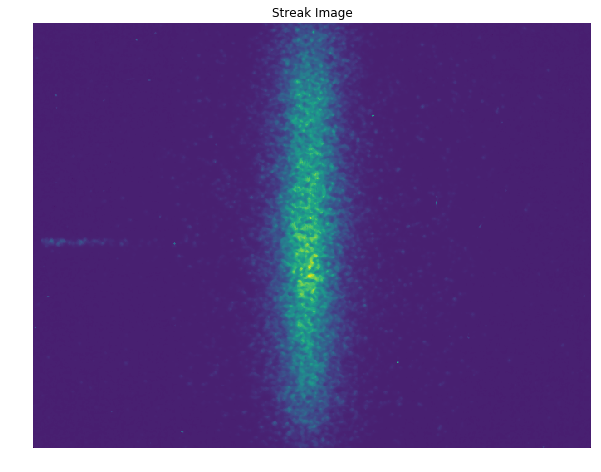

In [4]:
# Task 3

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

img_data = list(hdf_file["/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData"])
rows = list(hdf_file["/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight"])[0]
cols = list(hdf_file["/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth"])[0]

img_reshape = np.reshape(img_data, (rows, cols)) # reshaping 1D array into 2D array acc. to no. of rows and columns
img_filter = signal.medfilt(img_reshape) # median filtering on 2D array

# setting up image
plt.figure(figsize=(10,10)) 
plt.axis("off")
plt.title("Streak Image")
plt.imshow(img_filter)
plt.savefig("StreakImage.png", bbox_inches="tight") # bbox to exclude extra white space from img box
print("StreakImage.png file generation complete in current directory")
print("Streak Image:")